In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Initialise combined dataframe and get data source


In [2]:
combined_df = pd.DataFrame()
excel_file = 'data/EDM 2021 Storm Overflow Annual Return - all water and sewerage companies.xlsx'
excel_data = pd.ExcelFile(excel_file)

## Heading cleanup

Headings are inconsistant in spelling and formatting. To resolve this issue, I am using the first sheet of headings. Also skipping the first row as it contains a workbook heading.

In [3]:
first_sheet_name = excel_data.sheet_names[0]
first_sheet_df = pd.read_excel(excel_file, sheet_name=first_sheet_name, skiprows=1)
filters = first_sheet_df.columns.tolist()

Loops through each sheet in the excel_data

In [4]:
for sheet_name in excel_data.sheet_names:
    sheet_df = pd.read_excel(excel_file, sheet_name=sheet_name, skiprows=1)
    filtered_df = sheet_df[filters]
    combined_df = combined_df._append(filtered_df, ignore_index=True)

print(combined_df)

      Water Company Name  Site Name\n(EA Consents Database)  \
0          Anglian Water  ABTHORPE TERMINAL PUMPING STATION   
1          Anglian Water                SCHOOL LANE SPS ABY   
2          Anglian Water                 AKELEY (EX STW) PS   
3          Anglian Water  ALDBOROUGH WATER RECYCLING CENTRE   
4          Anglian Water                      ALDEBURGH STW   
...                  ...                                ...   
14467    Yorkshire Water                    ROYAL HOTEL CSO   
14468    Yorkshire Water  SCARBOROUGH WASTE WATER TREATMENT   
14469    Yorkshire Water                MILLHOUSES PARK CSO   
14470    Yorkshire Water                MILLHOUSES PARK CSO   
14471    Yorkshire Water            Chapel Land Kilham CSO*   

            Site Name\n(WaSC operational)\n[optional]  \
0                   ABTHORPE TERMINAL PUMPING STATION   
1                                   ABY-SCHOOL LA TPS   
2                                  AKELEY (EX STW) SP   
3              

In [7]:
print(combined_df.columns)

Index(['Water Company Name', 'Site Name\n(EA Consents Database)',
       'Site Name\n(WaSC operational)\n[optional]',
       'EA Permit Reference\n(EA Consents Database)',
       'WaSC Supplementary Permit Ref.\n[optional]',
       'Activity Reference on Permit\n(if >1 discharge on permit)',
       'Storm Discharge Asset Type',
       'Outlet Discharge NGR\n(EA Consents Database)',
       'WFD Waterbody ID (Cycle 2)\n(discharge outlet)',
       'WFD Waterbody Catchment Name (Cycle 2)\n(discharge outlet)',
       'Receiving Water / Environment (common name)\n(EA Consents Database)',
       'Shellfish Water\n (only populate for storm overflow with a Shellfish Water EDM requirement)',
       'Bathing Water\n(only populate for storm overflow with a Bathing Water EDM requirement)',
       'Initial EDM Commission Date',
       'Total Duration (hrs) all spills prior to processing through 12-24h count method',
       'Counted spills using 12-24h count method',
       'EDM Operation -\n% of rep

Filter out uncessary columns

In [8]:
selected_columns = ['Water Company Name', 
                    #'Site Name(EA Consents Database)', 
                    'Counted spills using 12-24h count method',
                    'Total Duration (hrs) all spills prior to processing through 12-24h count method'
                    ]
selected_df = combined_df[selected_columns]

print(selected_df)

      Water Company Name Counted spills using 12-24h count method  \
0          Anglian Water                                      0.0   
1          Anglian Water                                      NaN   
2          Anglian Water                                     51.0   
3          Anglian Water                                      2.0   
4          Anglian Water                                      7.0   
...                  ...                                      ...   
14467    Yorkshire Water                                      0.0   
14468    Yorkshire Water                                      NaN   
14469    Yorkshire Water                                      NaN   
14470    Yorkshire Water                                      NaN   
14471    Yorkshire Water                                      NaN   

      Total Duration (hrs) all spills prior to processing through 12-24h count method  
0                                                    0.0                           

Total Spill count by water company

      Water Company Name  Counted spills using 12-24h count method
0          Anglian Water                                       0.0
1          Anglian Water                                       0.0
2          Anglian Water                                      51.0
3          Anglian Water                                       2.0
4          Anglian Water                                       7.0
...                  ...                                       ...
14467    Yorkshire Water                                       0.0
14468    Yorkshire Water                                       0.0
14469    Yorkshire Water                                       0.0
14470    Yorkshire Water                                       0.0
14471    Yorkshire Water                                       0.0

[14472 rows x 2 columns]


/tmp/ipykernel_949568/3501324252.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['Counted spills using 12-24h count method'] = selected_df['Counted spills using 12-24h count method'].fillna(0)


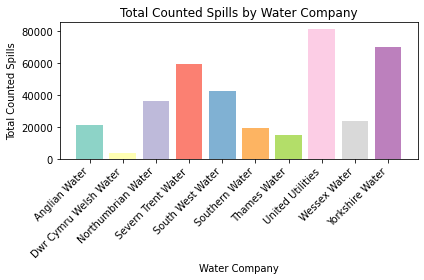

In [6]:
selected_df.loc[:, 'Counted spills using 12-24h count method'] = pd.to_numeric(selected_df['Counted spills using 12-24h count method'], errors='coerce')


selected_df['Counted spills using 12-24h count method'] = selected_df['Counted spills using 12-24h count method'].fillna(0)



print(selected_df)
# Group the data by 'Water Company Name' and calculate the total spills
grouped_df = selected_df.groupby('Water Company Name')['Counted spills using 12-24h count method'].sum()

# Plot the bar chart
colours = plt.cm.Set3(np.arange(len(grouped_df)))
plt.bar(grouped_df.index, grouped_df.values, color=colours)
plt.xlabel('Water Company')
plt.ylabel('Total Counted Spills')
plt.title('Total Counted Spills by Water Company')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipykernel_949568/1226067157.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['Total Duration (hrs) all spills prior to processing through 12-24h count method'] = selected_df['Total Duration (hrs) all spills prior to processing through 12-24h count method'].fillna(0)


      Water Company Name Counted spills using 12-24h count method  \
0          Anglian Water                                      0.0   
1          Anglian Water                                      NaN   
2          Anglian Water                                     51.0   
3          Anglian Water                                      2.0   
4          Anglian Water                                      7.0   
...                  ...                                      ...   
14467    Yorkshire Water                                      0.0   
14468    Yorkshire Water                                      NaN   
14469    Yorkshire Water                                      NaN   
14470    Yorkshire Water                                      NaN   
14471    Yorkshire Water                                      NaN   

       Total Duration (hrs) all spills prior to processing through 12-24h count method  
0                                                   0.00                          

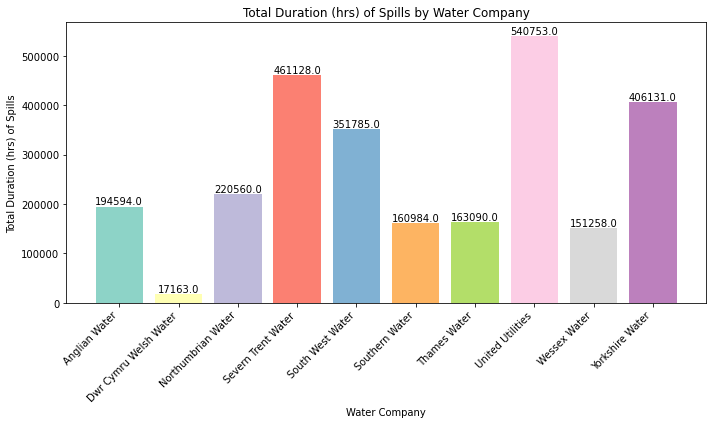

In [16]:

selected_df.loc[:, 'Total Duration (hrs) all spills prior to processing through 12-24h count method'] = pd.to_numeric(selected_df['Total Duration (hrs) all spills prior to processing through 12-24h count method'], errors='coerce')


selected_df['Total Duration (hrs) all spills prior to processing through 12-24h count method'] = selected_df['Total Duration (hrs) all spills prior to processing through 12-24h count method'].fillna(0)



print(selected_df)
# Group the data by 'Water Company Name' and calculate the total spills
grouped_df = selected_df.groupby('Water Company Name')['Total Duration (hrs) all spills prior to processing through 12-24h count method'].sum().round()
plt.figure(figsize=(10, 6))
# Plot the bar chart
colours = plt.cm.Set3(np.arange(len(grouped_df)))
plt.bar(grouped_df.index, grouped_df.values, color=colours)
plt.xlabel('Water Company')
plt.ylabel('Total Duration (hrs) of Spills')
plt.title('Total Duration (hrs) of Spills by Water Company')
for i, value in enumerate(grouped_df):
    plt.text(i, value, str(value), ha='center', va='bottom')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()